In [41]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [44]:
may = pd.read_csv('../data/may.csv/may.csv')

In [3]:
may.sumdgroup.unique()

array(['scooter', 'Scooter', 'bicycle'], dtype=object)

In [4]:
may_scooters = may.loc[may.sumdgroup.isin(['scooter', 'Scooter'])]

In [5]:
may_scooters = may_scooters[['pubdatetime', 'latitude', 'longitude', 'sumdid', 'chargelevel', 'companyname']]

In [6]:
may_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   pubdatetime  object 
 1   latitude     float64
 2   longitude    float64
 3   sumdid       object 
 4   chargelevel  float64
 5   companyname  object 
dtypes: float64(3), object(3)
memory usage: 1.1+ GB


In [9]:
may_scooters.to_pickle("../data/may.pkl")

In [56]:
may_scooters.head()

,latitude,longitude,sumdid,chargelevel,companyname,date,time,roundedtime
0,36.136822,-86.799877,PoweredLIRL1,93.0,Bird,2019-05-01,2021-10-16 00:01:41.247,2021-10-16
1,36.191252,-86.772945,PoweredXWRWC,35.0,Bird,2019-05-01,2021-10-16 00:01:41.247,2021-10-16
2,36.144752,-86.806293,PoweredMEJEH,90.0,Bird,2019-05-01,2021-10-16 00:01:41.247,2021-10-16
3,36.162056,-86.774688,Powered1A7TC,88.0,Bird,2019-05-01,2021-10-16 00:01:41.247,2021-10-16
4,36.150973,-86.783109,Powered2TYEF,98.0,Bird,2019-05-01,2021-10-16 00:01:41.247,2021-10-16


In [57]:
may_scooters['date'] = may_scooters['pubdatetime'].dt.date

KeyError: 'pubdatetime'

In [ ]:
may_scooters['hour'] = may_scooters['pubdatetime'].dt.hour

In [ ]:
may_scooters['minute'] = may_scooters['pubdatetime'].dt.minute

To round down to closest 15, this should work

15 * math.floor(number/15)


In [11]:
date = may_scooters["pubdatetime"].str.split(" ", n = 1, expand = True)

In [12]:
may_scooters['date'] = date[0]

In [13]:
may_scooters['time'] = date[1]

In [14]:
may_scooters.drop(columns=['pubdatetime'], inplace = True)

In [15]:
may_scooters.head()

,latitude,longitude,sumdid,chargelevel,companyname,date,time
0,36.136822,-86.799877,PoweredLIRL1,93.0,Bird,2019-05-01,00:01:41.247000
1,36.191252,-86.772945,PoweredXWRWC,35.0,Bird,2019-05-01,00:01:41.247000
2,36.144752,-86.806293,PoweredMEJEH,90.0,Bird,2019-05-01,00:01:41.247000
3,36.162056,-86.774688,Powered1A7TC,88.0,Bird,2019-05-01,00:01:41.247000
4,36.150973,-86.783109,Powered2TYEF,98.0,Bird,2019-05-01,00:01:41.247000


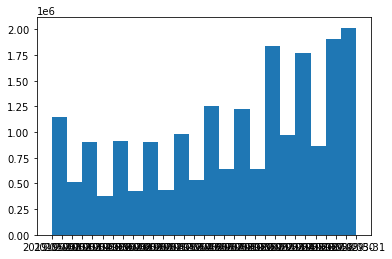

In [16]:
plt.hist('date', bins = 20, data = may_scooters);

In [17]:
may_scooters.isnull().sum()

latitude         0
longitude        0
sumdid           0
chargelevel    283
companyname      0
date             0
time             0
dtype: int64

In [18]:
scooter_names_may = may_scooters.sumdid.nunique()

In [19]:
scooter_count_may = may_scooters.sumdid.value_counts()

In [20]:
scooter_count_may.head()

PoweredIE7H5RIN474PE    8921
PoweredUK65LOU3K5N7G    8748
PoweredIOHG2G3XKATUL    8576
PoweredJCKMQCAL2SSNJ    8521
Powered4NYK5PWADVIAU    8439
Name: sumdid, dtype: int64

In [21]:
may_scooters.companyname.value_counts()

Lime      7111655
Bird      4334006
Lyft      3112581
Jump      2984630
Spin      1301001
Gotcha     915314
Bolt       524395
Name: companyname, dtype: int64

In [20]:
may_scooters = may_scooters[['sumdid', 'companyname','date','time','latitude', 'longitude', 'chargelevel']]

In [1]:
may_scooters.head(50)

NameError: name 'may_scooters' is not defined

In [24]:
may_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   sumdid       object 
 1   companyname  object 
 2   date         object 
 3   time         object 
 4   latitude     float64
 5   longitude    float64
 6   chargelevel  float64
dtypes: float64(3), object(4)
memory usage: 1.2+ GB


In [22]:
may_scooters['sumdid'] = may_scooters.sumdid.astype(int64)

NameError: name 'int64' is not defined

bird_scooters_may = may_scooters.loc[may_scooters['companyname'] == 'Bird'].sum()
df.pivot(index='foo', columns='bar', values='baz')

In [23]:
pivot = pd.pivot_table(may_scooters, index ='companyname', values = 'sumdid', aggfunc ='count', margins = True)
pivot

,sumdid
companyname,
Bird,4334006
Bolt,524395
Gotcha,915314
Jump,2984630
Lime,7111655
Lyft,3112581
Spin,1301001
All,20283582


In [25]:
may_scooters = may_scooters.dropna()

In [26]:
may_scooters

,latitude,longitude,sumdid,chargelevel,companyname,date,time
0,36.136822,-86.799877,PoweredLIRL1,93.0,Bird,2019-05-01,00:01:41.247000
1,36.191252,-86.772945,PoweredXWRWC,35.0,Bird,2019-05-01,00:01:41.247000
2,36.144752,-86.806293,PoweredMEJEH,90.0,Bird,2019-05-01,00:01:41.247000
3,36.162056,-86.774688,Powered1A7TC,88.0,Bird,2019-05-01,00:01:41.247000
4,36.150973,-86.783109,Powered2TYEF,98.0,Bird,2019-05-01,00:01:41.247000
...,...,...,...,...,...,...,...
20292498,36.163900,-86.782300,Poweredbb60ef04-c719-597f-805f-20978964fd8c,49.0,Jump,2019-05-31,23:59:42
20292499,36.160600,-86.776800,Powered9f5743ed-7f81-539b-9e37-6503d54445d3,68.0,Jump,2019-05-31,23:59:42
20292500,36.160600,-86.776900,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc,53.0,Jump,2019-05-31,23:59:42
20292501,36.162400,-86.774500,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c,42.0,Jump,2019-05-31,23:59:42


# converting the string to datetime format
df['Dates'] = pd.to_datetime(df['Dates'], format='%y%m%d')
 
# printing dataframe
print(df)
print()
 
print(df.dtypes)

In [32]:
may_scooters['date']= pd.to_datetime(may_scooters['date'])

<ipython-input-32-70a204e2fdaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_scooters['date']= pd.to_datetime(may_scooters['date'])


####df['Date'] = df['Date'].astype('datetime64[ns]')

In [36]:
may_scooters['time']= may_scooters['time'].astype('datetime64[ns]')

<ipython-input-36-d70c3ea9af2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_scooters['time']= may_scooters['time'].astype('datetime64[ns]')


In [37]:
print(may_scooters.dtypes)

latitude              float64
longitude             float64
sumdid                 object
chargelevel           float64
companyname            object
date           datetime64[ns]
time           datetime64[ns]
dtype: object


df['<column>'] = df['<column>'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour,15*(dt.minute // 15)))

In [55]:
may_scooters['time'] = may_scooters['time'].apply(lambda dt : dat.dt(dt.hour,15*(dt.minute // 15)))

AttributeError: 'Timestamp' object has no attribute 'dt'


# Changing start time for each hour, by default start time is at 0th minute
data.resample('W',  loffset='30Min30s').price.sum().head(2)
data.resample('W', loffset='30Min30s').price.sum().head(2)
  
# we can also aggregate it will show quantity added in each week
# as well as the total amount added in each week
data.resample('W', loffset='30Min30s').agg(
    {'price': 'sum', 'quantity': 'sum'}).head(5)

###### df['new column']=df['old column'].dt.round('15min')  

In [46]:
may_scooters['roundedtime']=may_scooters['time'].round('15min')

<ipython-input-46-ceef7bd4235c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_scooters['roundedtime']=may_scooters['time'].round('15min')


In [47]:
may_scooters

,latitude,longitude,sumdid,chargelevel,companyname,date,time,roundedtime
0,36.136822,-86.799877,PoweredLIRL1,93.0,Bird,2019-05-01,2021-10-16 00:01:41.247,2021-10-16
1,36.191252,-86.772945,PoweredXWRWC,35.0,Bird,2019-05-01,2021-10-16 00:01:41.247,2021-10-16
2,36.144752,-86.806293,PoweredMEJEH,90.0,Bird,2019-05-01,2021-10-16 00:01:41.247,2021-10-16
3,36.162056,-86.774688,Powered1A7TC,88.0,Bird,2019-05-01,2021-10-16 00:01:41.247,2021-10-16
4,36.150973,-86.783109,Powered2TYEF,98.0,Bird,2019-05-01,2021-10-16 00:01:41.247,2021-10-16
...,...,...,...,...,...,...,...,...
20292498,36.163900,-86.782300,Poweredbb60ef04-c719-597f-805f-20978964fd8c,49.0,Jump,2019-05-31,2021-10-16 23:59:42.000,2021-10-17
20292499,36.160600,-86.776800,Powered9f5743ed-7f81-539b-9e37-6503d54445d3,68.0,Jump,2019-05-31,2021-10-16 23:59:42.000,2021-10-17
20292500,36.160600,-86.776900,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc,53.0,Jump,2019-05-31,2021-10-16 23:59:42.000,2021-10-17
20292501,36.162400,-86.774500,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c,42.0,Jump,2019-05-31,2021-10-16 23:59:42.000,2021-10-17


In [48]:
print(may_scooters.dtypes)

latitude              float64
longitude             float64
sumdid                 object
chargelevel           float64
companyname            object
date           datetime64[ns]
time           datetime64[ns]
roundedtime    datetime64[ns]
dtype: object
